## I. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
# Model  Building
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Model Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## II. Data Preprocessing

In [2]:
df = pd.read_csv("E:\ExcelR Assignment\Assignment 15 - Random Forests\Fraud_Check.csv")
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Two types of Variables are there : 

#### Categorical Variables : Undergrad | Marital.Status | Urban
#### Continuous Variables : Taxable.Income | City.Population | Work.Experience

In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.shape

(600, 6)

## 1. Data Analysis & Data Visualization

### 1.1 Univariate Analysis for Continuous Variables

<AxesSubplot:xlabel='Work.Experience', ylabel='Count'>

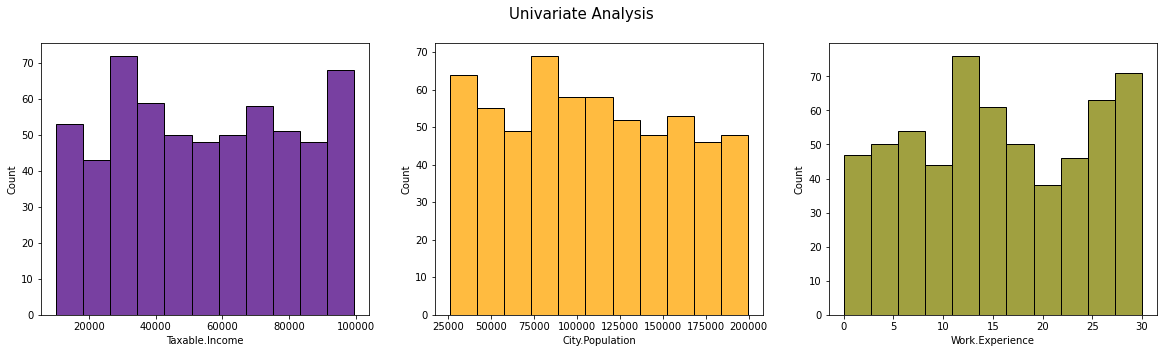

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Univariate Analysis',fontsize=15)
sns.histplot(df['Taxable.Income'],ax=axes[0],color='indigo')
sns.histplot(df['City.Population'],ax=axes[1],color='orange')
sns.histplot(df['Work.Experience'],ax=axes[2],color='olive')

### 1.2 Univariate Analysis for Categorical Variables

<AxesSubplot:xlabel='Urban', ylabel='count'>

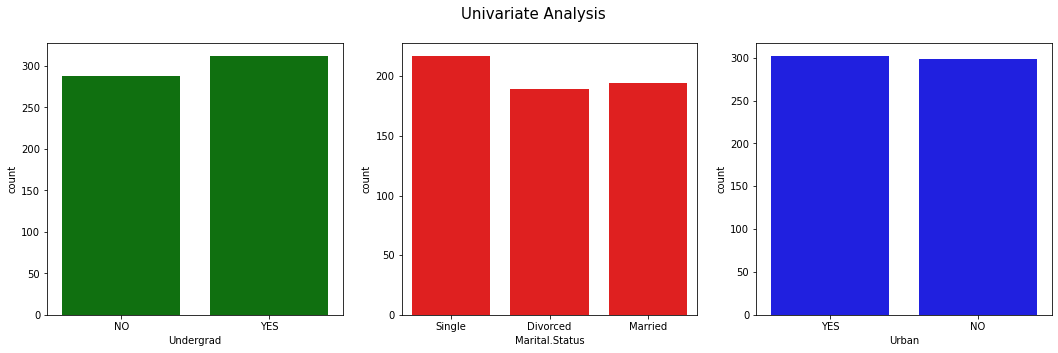

In [7]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
fig.suptitle('Univariate Analysis',fontsize=15)
sns.countplot(data=df,x='Undergrad',ax=axes[0],color='green')
sns.countplot(data=df,x='Marital.Status',ax=axes[1],color='red')
sns.countplot(data=df,x='Urban',ax=axes[2],color='blue')

#### Inferences : 
1. In continuous variables there is not much variance in their distribution
2. In categorical variables there almost equal proportions of Class for each category given

### 1.3 Bivariate Analysis

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

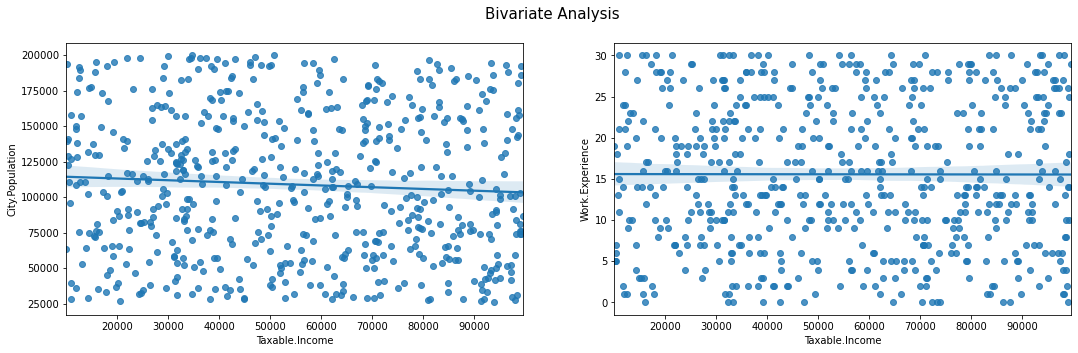

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Bivariate Analysis',fontsize=15)
sns.regplot(data=df,ax=axes[0],x=df['Taxable.Income'],y=df['City.Population'])
sns.regplot(data=df,ax=axes[1],x=df['Taxable.Income'],y=df['Work.Experience'])

<AxesSubplot:>

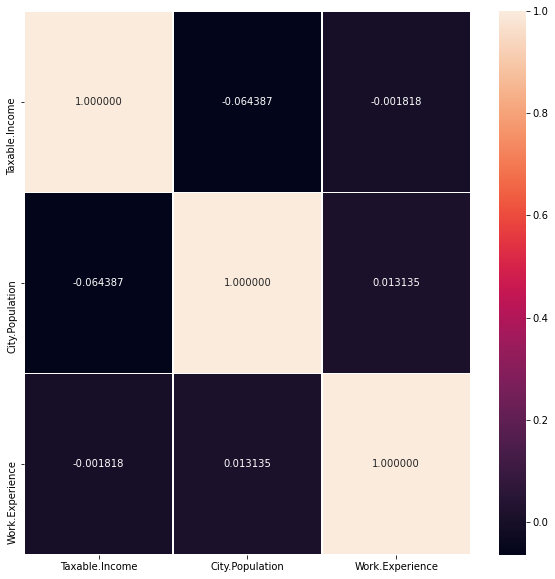

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt="f",linewidths=.5)

### Inferences:
1. City Population and Taxable Income has slight negative relation
2. Work Experience and Taxable Income has slight positive relation

## 2. Data Pre-Processing

In [10]:
df1 = df.copy()
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


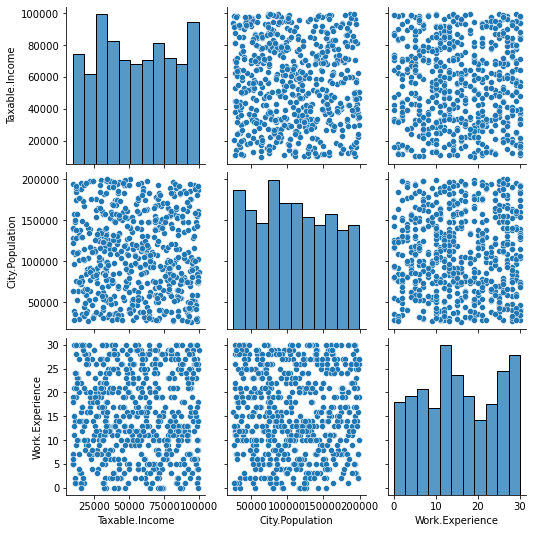

In [11]:
sns.pairplot(df1)

### 2.1 One Hot Encoding Features

In [12]:
df1 = pd.get_dummies(df1)
df1.head(2)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1


### 2.2 Binning

In [13]:
df1.loc[df1['Taxable.Income']<=30000,'Tax_Slab'] ='Risky'
df1.loc[df1['Taxable.Income']>30000,'Tax_Slab'] ='Good'
df1.head(2)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_Slab
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good


In [14]:
df1=df1.drop(['Taxable.Income'],axis=1)
df1.head(2)

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_Slab
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good


### 2.3 Label Encoding Target Variable

In [15]:
label_encoder = preprocessing.LabelEncoder()
df1['Tax_Label']= label_encoder.fit_transform(df1['Tax_Slab'])
df1.tail(10)

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_Slab,Tax_Label
590,85195,14,1,0,0,1,0,0,1,Good,0
591,132859,18,0,1,0,0,1,0,1,Risky,1
592,75143,16,0,1,0,0,1,1,0,Good,0
593,131963,10,1,0,1,0,0,0,1,Good,0
594,97526,9,1,0,0,1,0,0,1,Good,0
595,39492,7,0,1,1,0,0,0,1,Good,0
596,55369,2,0,1,1,0,0,0,1,Good,0
597,154058,0,1,0,1,0,0,0,1,Good,0
598,180083,17,0,1,0,1,0,1,0,Good,0
599,158137,16,1,0,1,0,0,1,0,Good,0


### So Tax_Slab having Good is encoded as 0, and Risky is encoded as 1

In [16]:
def stand_func(i):
    x = (i-i.mean())/(i.std())
    return (x)
df1['Sc'] = stand_func(df1.iloc[:,0:1])
df1['Sw'] = stand_func(df1.iloc[:,1:2])
df1.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_Slab,Tax_Label,Sc,Sw
0,50047,10,1,0,0,0,1,0,1,Good,0,-1.177538,-0.628618
1,134075,18,0,1,1,0,0,0,1,Good,0,0.508076,0.276140
2,160205,30,1,0,0,1,0,0,1,Good,0,1.032248,1.633276
3,193264,15,0,1,0,0,1,0,1,Good,0,1.695416,-0.063145
4,27533,28,1,0,0,1,0,1,0,Good,0,-1.629172,1.407087


In [17]:
df1 = df1.drop(['City.Population','Work.Experience'],axis=1)

In [18]:
df1.columns

Index(['Undergrad_NO', 'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_NO',
       'Urban_YES', 'Tax_Slab', 'Tax_Label', 'Sc', 'Sw'],
      dtype='object')

In [19]:
X = df1.loc[:,['Undergrad_NO', 'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_NO',
       'Urban_YES','Sc', 'Sw']]
y = df1.loc[:,'Tax_Label']

In [20]:
df1['Tax_Label'].value_counts()

0    476
1    124
Name: Tax_Label, dtype: int64

In [21]:
df1.head()

,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_Slab,Tax_Label,Sc,Sw
0,1,0,0,0,1,0,1,Good,0,-1.177538,-0.628618
1,0,1,1,0,0,0,1,Good,0,0.508076,0.276140
2,1,0,0,1,0,0,1,Good,0,1.032248,1.633276
3,0,1,0,0,1,0,1,Good,0,1.695416,-0.063145
4,1,0,0,1,0,1,0,Good,0,-1.629172,1.407087


### Here Target Variable is unbalanced so we would do Oversampling to balance Target Variable

In [22]:
from imblearn.combine import SMOTETomek
# Performing Oversampling method to handle imbalanced data

smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,y)

In [23]:
X.shape,y.shape,X_res.shape,y_res.shape

((600, 9), (600,), (866, 9), (866,))

In [24]:
y.value_counts(),y_res.value_counts()

(0    476
 1    124
 Name: Tax_Label, dtype: int64,
 1    433
 0    433
 Name: Tax_Label, dtype: int64)

### Here we can observe that Target Variable is having equal proportion of Classes

## 1. Logistic Regression

### 1.1 Model Validation Technique : K-Fold Cross Validation Technique

In [25]:
kfold = KFold(n_splits=20,shuffle=True,random_state=10)
model1 = LogisticRegression(max_iter=1500,random_state=10)
model1.fit(X_res,y_res)
result1 = cross_val_score(model1,X_res,y_res,cv=kfold)
result1.mean()

0.6257663847780126

### 1.2 Model Validation Technique : Train Test Split Validation Technique

In [26]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X_res,y_res, test_size=0.3,random_state=10,stratify=y_res)

In [27]:
model1.fit(X_train,y_train)
result2 = model1.score(X_train,y_train)
result3 = model1.score(X_test,y_test)
result2,result3

(0.636963696369637, 0.6153846153846154)

#### ROC SCORE

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
result4 = roc_auc_score(y_test,model1.predict(X_test))
result4

0.6153846153846154

#### ROC CURVE

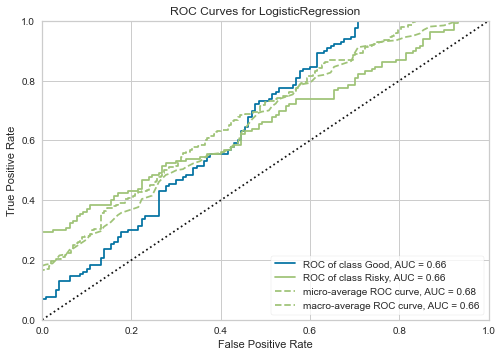

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [29]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model1, classes=["Good", "Risky"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

#### PREDICTING CLASS

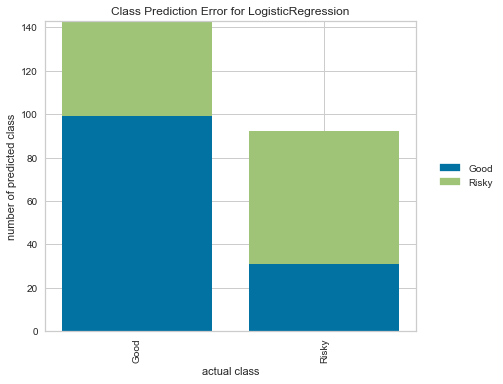

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [30]:
from yellowbrick.classifier import ClassPredictionError
classes = ['Good','Risky']
# Instantiate the classification model and visualizer
visualizer1 = ClassPredictionError(
    
    LogisticRegression(max_iter=1500,random_state=10),classes=classes
    #RandomForestClassifier(n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer1.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer1.score(X_test, y_test)

# Draw visualization
visualizer1.show()

#### CONFUSION MATRIX

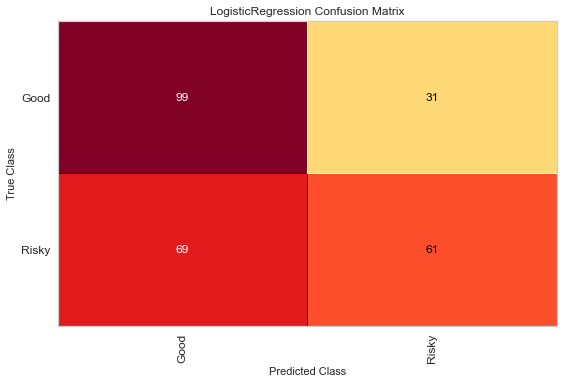

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model1, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### 1.3 Model Validation Technique : LOOCV

In [33]:
loocv = LeaveOneOut()
result5 = cross_val_score(model1,X_res,y_res,cv=loocv)
result5.mean()

0.6177829099307159

## 2. Decision Tree Classifier with Grid-Search CV

In [34]:
dtmodel = DecisionTreeClassifier(random_state=10)
a=[3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]
gridparam = GridSearchCV(dtmodel,parameter)
gridparam.fit(X_res,y_res)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [35]:
gridparam.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

### 2.1 Model Validation Technique : K-Fold Validation Technique

In [36]:
model2 = DecisionTreeClassifier(random_state=10,max_depth=7,criterion='gini',max_leaf_nodes=10,min_samples_split=3,min_samples_leaf=3)
model2.fit(X_res,y_res)
result6 = cross_val_score(model2,X_res,y_res,cv=kfold)
result6.mean()

0.5381078224101479

### 2.2 Model Validation Technique : Train Test Split Validation Technique

In [37]:
model2.fit(X_train,y_train)
result7 = model2.score(X_train,y_train)
result8 = model2.score(X_test,y_test)
result7,result8

(0.6633663366336634, 0.6038461538461538)

#### ROC SCORE

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
result9 = roc_auc_score(y_test,model2.predict(X_test))
result9

0.6038461538461538

#### ROC CURVE

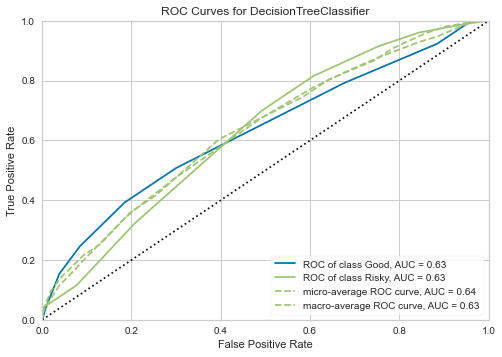

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model2, classes=["Good", "Risky"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

#### PREDICTING CLASS

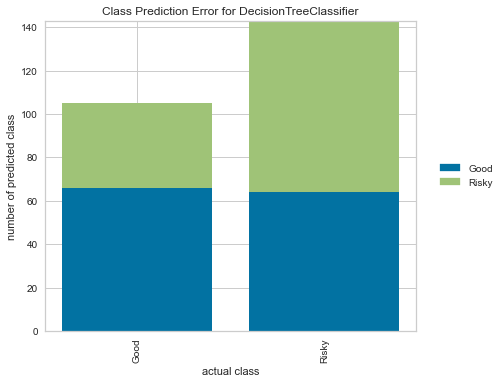

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [40]:
from yellowbrick.classifier import ClassPredictionError
classes = ['Good','Risky']
# Instantiate the classification model and visualizer
visualizer1 = ClassPredictionError(
    
    DecisionTreeClassifier(random_state=10,max_depth=7,criterion='gini',max_leaf_nodes=10,min_samples_split=3,min_samples_leaf=3),classes=classes
    )

# Fit the training data to the visualizer
visualizer1.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer1.score(X_test, y_test)

# Draw visualization
visualizer1.show()

#### CONFUSION MATRIX

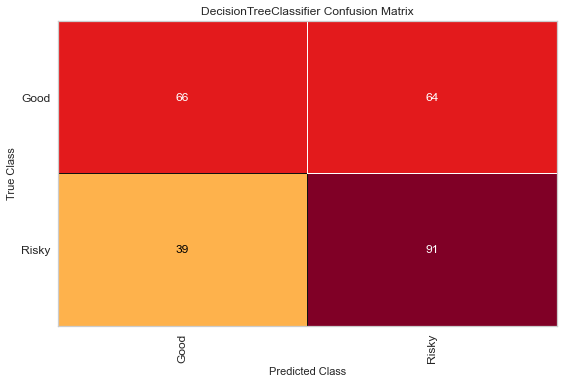

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model2, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### 2.3 Model Validation Technique : LOOCV

In [42]:
loocv = LeaveOneOut()
result10 = cross_val_score(model1,X_res,y_res,cv=loocv)
result10.mean()

0.6177829099307159

## 3. Bagging Classifier with Grid-Search CV

In [43]:
num1_trees = [100,200,300,400,500,600,700,800,900,1000]
cart1 = DecisionTreeClassifier(random_state=10,max_depth=7,max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3,criterion='gini')
a = LogisticRegression(max_iter=1000,solver='liblinear')
parameter = [{'base_estimator':[cart1,a],'n_estimators':num1_trees}]
gB_model = BaggingClassifier()
gridBagging = GridSearchCV(gB_model,parameter)
gridBagging.fit(X_res,y_res)
gridBagging.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=3,
                        min_samples_split=3, random_state=10),
 'n_estimators': 100}

### 3.1 Model Validation Technique : K-Fold Cross Validation Technique

In [44]:
cart2 = DecisionTreeClassifier(random_state=10,max_depth=7,max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3,criterion='gini')
model3 = BaggingClassifier(base_estimator=cart2,n_estimators=300)
model3.fit(X_res,y_res)
result11 = cross_val_score(model3,X_res,y_res,cv=kfold)
result11.mean()

0.6433932346723044

### 3.2 Model Validation Technique : Train Test Split Validation Technique

In [45]:
model3.fit(X_train,y_train)
result12 = model3.score(X_train,y_train)
result13 = model3.score(X_test,y_test)
result12,result13

(0.7739273927392739, 0.7)

#### ROC SCORE

In [46]:
result14 = roc_auc_score(y_test,model3.predict(X_test))
result14

0.7

#### ROC CURVE

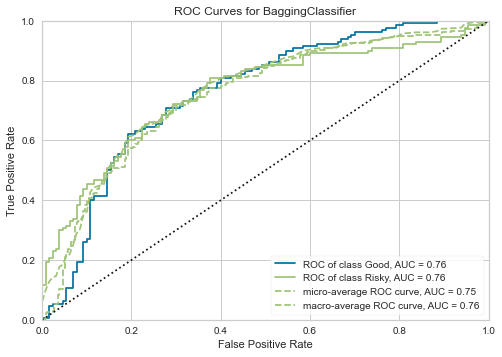

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
visualizer = ROCAUC(model3, classes=["Good", "Risky"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

#### PREDICTING CLASS

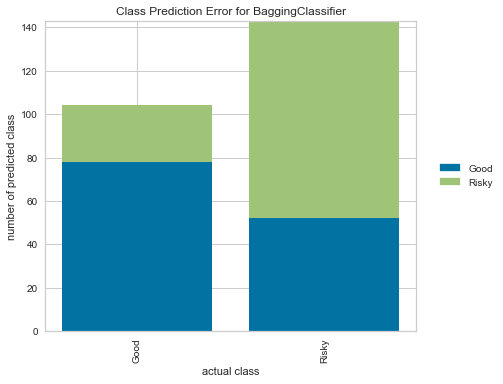

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [48]:
from yellowbrick.classifier import ClassPredictionError
classes = ['Good','Risky']
# Instantiate the classification model and visualizer
visualizer1 = ClassPredictionError(
    
    BaggingClassifier(base_estimator=cart2,n_estimators=300),classes=classes
    )

# Fit the training data to the visualizer
visualizer1.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer1.score(X_test, y_test)

# Draw visualization
visualizer1.show()

#### CONFUSION MATRIX

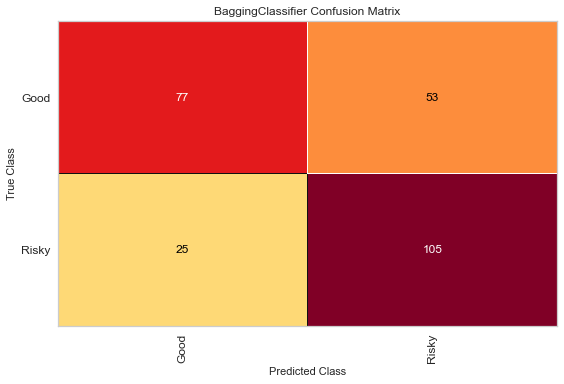

<AxesSubplot:title={'center':'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [49]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model3, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### 3.3 Model Validation Technique : LOOCV Validation Technique

In [50]:
loocv = LeaveOneOut()
result15 = cross_val_score(model3,X_res,y_res,cv=loocv)
result15.mean()

0.6431870669745958

## 4. RANDOM FOREST WITH GRID-SEARCH CV

### NOTE : As the RAM support on my Laptop is 8GB, so i ran below 2 codes on GOOGLE COLAB

In [ ]:
a = range(2,20)
parameter = [{'criterion':['gini','entropy'],'max_depth':a,'max_leaf_nodes':a}]
Rmodel = RandomForestClassifier()

In [ ]:
gridRF = GridSearchCV(Rmodel,parameter)
gridRF.fit(X_res,y_res)
gridRF.best_params_

### 4.1 Model Validation Technique : K-Fold Validation Technique

In [51]:
model4 = RandomForestClassifier(n_estimators=800,criterion='gini', max_depth=11, max_leaf_nodes=19,random_state=10)
kfold = KFold(n_splits=20,shuffle=True,random_state=10)
model4.fit(X_res,y_res)
result16 = cross_val_score(model4,X_res,y_res,cv=kfold)
result16.mean()

0.7252906976744186

### 4.2 Model Validation Technique : Train Test Split Validation Technique

In [52]:
model4.fit(X_train,y_train)
result17 = model4.score(X_train,y_train)
result18 = model4.score(X_test,y_test)
print(result17,result18)

0.8366336633663366 0.7076923076923077


#### ROC

In [53]:
result19 = roc_auc_score(y_test,model2.predict(X_test))
result19

0.6038461538461538

#### ROC CURVE

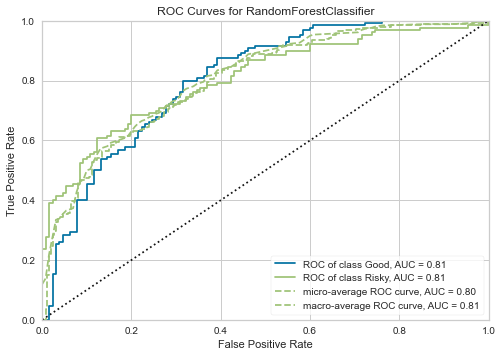

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
visualizer = ROCAUC(model4, classes=["Good", "Risky"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

#### PREDICTION CLASS

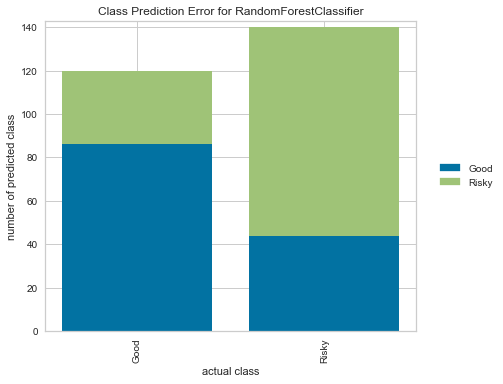

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [55]:
# Instantiate the classification model and visualizer
visualizer1 = ClassPredictionError(
    
    RandomForestClassifier(random_state=10,max_depth=11,criterion='gini',max_leaf_nodes=19),classes=classes
    )

# Fit the training data to the visualizer
visualizer1.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer1.score(X_test, y_test)

# Draw visualization
visualizer1.show()

#### CONFUSION MATRIX

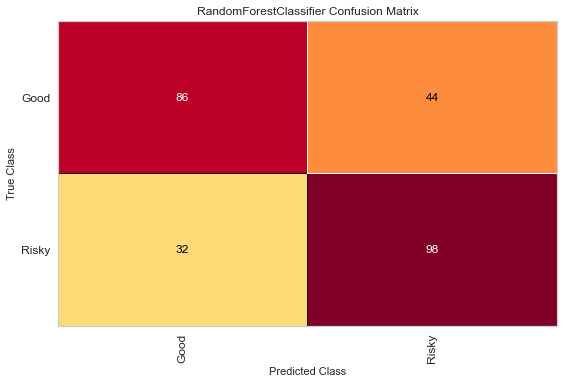

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [57]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model4, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### 4.3 Model Validation Technique : LOOCV Validation Technique

In [58]:
loocv = LeaveOneOut()
result20 = cross_val_score(model4,X_res,y_res,cv=loocv)
result20.mean()

0.7263279445727483

## 5. AdaBoost Classifier

### 5.1 Model Validation Technique : K-Fold Cross Validation Technique

In [59]:
model5 = AdaBoostClassifier(base_estimator=cart2,n_estimators=1000,random_state=10)
model5.fit(X_res,y_res)
result21 = cross_val_score(model5,X_res,y_res,cv=kfold)
result21.mean()

0.7655391120507399

### 5.2 Model Validation Technique : Train Test Validation Technique

In [60]:
model5.fit(X_train,y_train)
result22 = model5.score(X_train,y_train)
result23 = model5.score(X_test,y_test)
result22,result23

(1.0, 0.8038461538461539)

#### ROC

In [61]:
result24 = roc_auc_score(y_test,model5.predict(X_test))
result24

0.8038461538461538

#### ROC CURVE

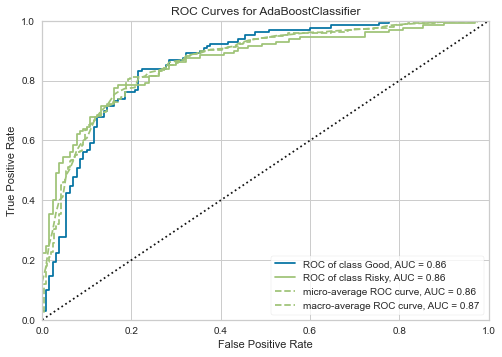

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
visualizer = ROCAUC(model5, classes=["Good", "Risky"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

#### PREDICTION CLASS

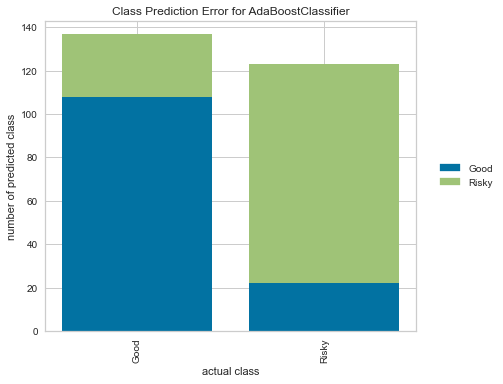

<AxesSubplot:title={'center':'Class Prediction Error for AdaBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [63]:
# Instantiate the classification model and visualizer
visualizer1 = ClassPredictionError(
    
    AdaBoostClassifier(base_estimator=cart2,n_estimators=1000,random_state=10),classes=classes
    )

# Fit the training data to the visualizer
visualizer1.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer1.score(X_test, y_test)

# Draw visualization
visualizer1.show()

#### CONFUSION MATRIX

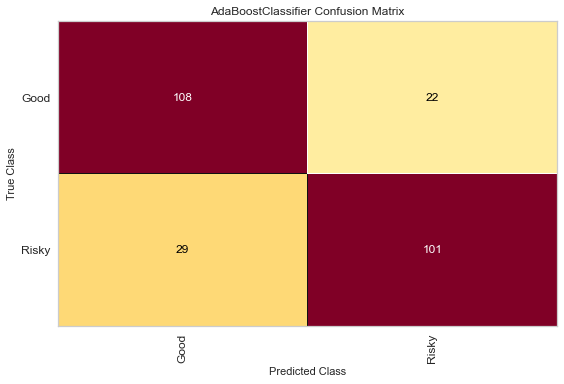

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [64]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model5, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### 5.3 Model Validation Technique : LOOCV Validation Technique

In [65]:
loocv = LeaveOneOut()
result25 = cross_val_score(model5,X_res,y_res,cv=loocv)
result25.mean()

0.7621247113163973

## 6. STACKING

In [66]:
estimators = []
model_1 = LogisticRegression(max_iter=1500,random_state=10)
estimators.append(('Logistic Regression', model_1))
model_2 = DecisionTreeClassifier(random_state=10,max_depth=7,criterion='gini',max_leaf_nodes=10,min_samples_split=3,min_samples_leaf=3)
estimators.append(('Decision Tree', model_2))
model_3 = SVC(random_state=10)
estimators.append(('SVM', model_3))
model_4 = BaggingClassifier(base_estimator=cart2,n_estimators=300,random_state=10)
estimators.append(('Bagging Classifier', model_4))
model_5 = RandomForestClassifier(n_estimators=800,criterion='gini', max_depth=None, max_leaf_nodes=19,random_state=10)
estimators.append(('Random Forest Classifier', model_5))
model_6 = AdaBoostClassifier(base_estimator=cart2,n_estimators=1000,random_state=10)
estimators.append(('AdaBoost Classifier', model_6))

### 6.1 Model Validation Technique : K-Fold Validation Technique

In [67]:
model6 = VotingClassifier(estimators)
kfold = KFold(n_splits=20,shuffle=True,random_state=10)
model6.fit(X_res,y_res)
result26 = cross_val_score(model6,X_res,y_res,cv=kfold)
result26.mean() 

0.7160940803382663

### 6.2 Model Validation Technique : Train -Test Validation Technique

In [68]:
model6.fit(X_train,y_train)
result27 = model6.score(X_train,y_train)
result28 = model6.score(X_test,y_test)
result27,result28

(0.8415841584158416, 0.7269230769230769)

#### ROC

In [69]:
result29 = roc_auc_score(y_test,model6.predict(X_test))
result29

0.726923076923077

#### PREDICT CLASS

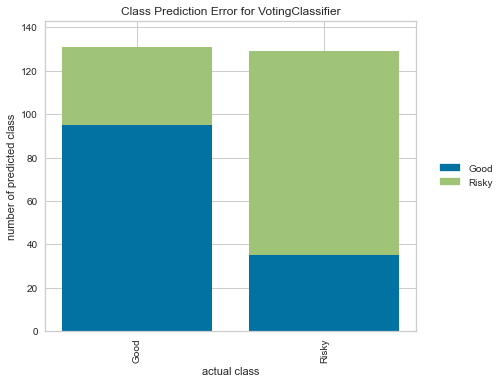

<AxesSubplot:title={'center':'Class Prediction Error for VotingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [73]:
# Instantiate the classification model and visualizer
visualizer1 = ClassPredictionError(
    
    VotingClassifier(estimators),classes=classes
    )

# Fit the training data to the visualizer
visualizer1.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer1.score(X_test, y_test)

# Draw visualization
visualizer1.show()

#### CONFUSION MATRIX

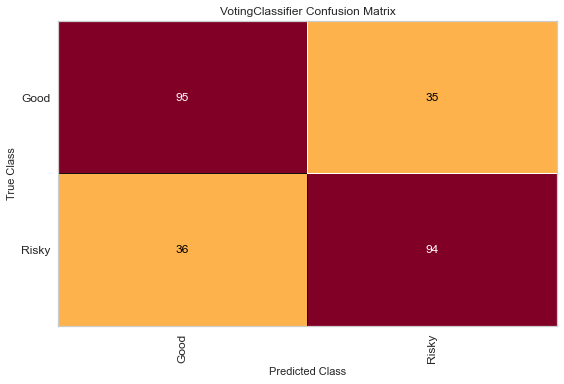

<AxesSubplot:title={'center':'VotingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [74]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model6, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### 6.3 Model Validation Technique : LOOCV Validation Technique

In [75]:
loocv = LeaveOneOut()
result30 = cross_val_score(model6,X_res,y_res,cv=loocv)
result30.mean()

0.7113163972286374

## 7. ADA-BOOST on RANDOM FOREST

### 7.1 Model Validation Technique : K-Fold Cross Validation Technique

In [80]:
model7 = AdaBoostClassifier(base_estimator=model4,n_estimators=1000,random_state=10)
kfold = KFold(n_splits=20,shuffle=True,random_state=10)
model7.fit(X_res,y_res)
result31 = cross_val_score(model7,X_res,y_res,cv=kfold)
result31.mean()

0.8003435517970401

### 7.2 Model Validation Technique : Train-Test Split Validation Technique

In [81]:
model7.fit(X_train,y_train)
result32 = model7.score(X_train,y_train)
result33 = model7.score(X_test,y_test)
result32,result33

(0.9785478547854786, 0.7923076923076923)

In [82]:
result34 = roc_auc_score(y_test,model7.predict(X_test))
result34

0.7923076923076922

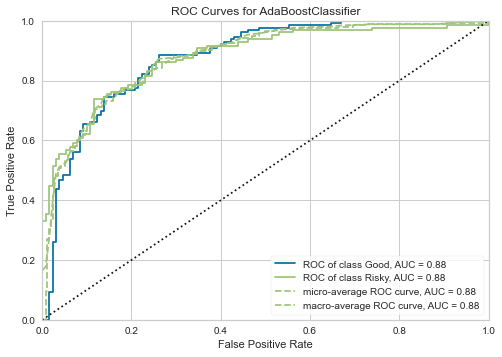

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
visualizer = ROCAUC(model7, classes=["Good", "Risky"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

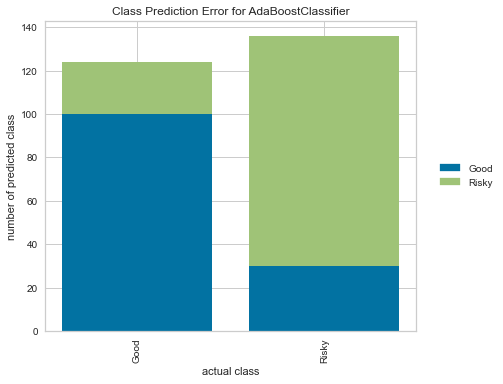

<AxesSubplot:title={'center':'Class Prediction Error for AdaBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [84]:
# Instantiate the classification model and visualizer
visualizer1 = ClassPredictionError(
    
    AdaBoostClassifier(base_estimator=model4,n_estimators=1000,random_state=10),classes=classes
    )

# Fit the training data to the visualizer
visualizer1.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer1.score(X_test, y_test)

# Draw visualization
visualizer1.show()

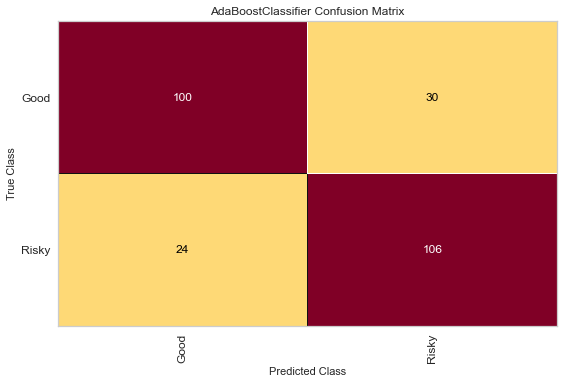

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [85]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model7, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### 7.3 Model Validation Technique : LOOCV Validation Technique

In [86]:
loocv = LeaveOneOut()
result35 = cross_val_score(model7,X_res,y_res,cv=loocv)
result35.mean()

0.8025404157043879

## Overall Summary

### As the Jupyter Note hanged from here, variables lost their values and I have to manually write results

In [4]:
## Results = pd.DataFrame({'Models':['Logistic Regression Classifier','Decision Tree Classifier','Bagging Classifier','Random Forest Classifier','AdaBoost Classifier','Stacking','Adaboost on Random Forest'],'K-Fold Accuracy':[result1.mean(),result6.mean(),result11.mean(),result16.mean(),result21.mean(),result26.mean(),result31.mean()],'Train Accuracy':[result2,result7,result12,result17,result22,result27,result32],'Test Accuracy':[result3,result8,result13,result18,result23,result28,result33],'ROC':[result4,result9,result14,result19,result24,result29,result34],'LOOCV':[result5.mean(),result10.mean(),result15.mean(),result20.mean(),result25.mean(),result30.mean(),result35.mean()]})

Results = pd.DataFrame({'Models':['Logistic Regression Classifier','Decision Tree Classifier','Bagging Classifier','Random Forest Classifier','AdaBoost Classifier','Stacking','Adaboost on Random Forest'],'K-Fold Accuracy':[0.63,0.54,0.64,0.73,0.77,0.72,0.80],'Train Accuracy':[0.64,0.67,0.77,0.84,1.0,0.84,0.98],'Test Accuracy':[0.62,0.60,0.7,0.71,0.80,0.73,0.79],'ROC':[0.62,0.60,0.7,0.60,0.80,0.73,0.79],'LOOCV':[0.62,0.62,0.64,0.73,0.76,0.71,0.80]})
Results

,Models,K-Fold Accuracy,Train Accuracy,Test Accuracy,ROC,LOOCV
0,Logistic Regression Classifier,0.63,0.64,0.62,0.62,0.62
1,Decision Tree Classifier,0.54,0.67,0.60,0.60,0.62
2,Bagging Classifier,0.64,0.77,0.70,0.70,0.64
3,Random Forest Classifier,0.73,0.84,0.71,0.60,0.73
4,AdaBoost Classifier,0.77,1.00,0.80,0.80,0.76
5,Stacking,0.72,0.84,0.73,0.73,0.71
6,Adaboost on Random Forest,0.80,0.98,0.79,0.79,0.80


### So, from the above Models we can choose Adaboost on Random Forest  to get better Test Result